## Importing Libraries

In [41]:
import numpy as np
import matplotlib.pyplot as plt

## Function Definitions 

#### Function to find the Euclidean Distance

In [42]:
def distance(p1,p2):
    return np.linalg.norm(p1 - p2)

#### Function to find the index of Minimum Distance node

In [43]:
def min_distance_value_index(distance_mat):
    idx = np.argmin(distance_mat)
    idx_x = idx//100                # Finding the corresponding indices from 1D matrix
    idx_y = idx%100
    return idx_x,idx_y

#### Function to find the neighborhood value

In [44]:
def nbh(sigma_o,cur_itr,tot_itr,distance):
    sigma_k = sigma_o * np.exp(-cur_itr/tot_itr)
    nbh_dist = np.exp(-(distance**2) / (2 * sigma_k**2))
    return nbh_dist,sigma_k

#### Function to calculate learning rate per iteration

In [45]:
def get_learning_rate(aplha_o,cur_itr,tot_itr):
    return aplha_o*np.exp(-cur_itr/tot_itr)

#### Function to calculate radius per iteration

In [46]:
def update_sigma_o(sigma_o,cur_itr,tot_itr):
    return sigma_o * np.exp(-cur_itr/tot_itr)

#### Function to display the weight vector

In [47]:
def show_img(inital_weight,sigma,epoch):
    plt.title("Epoch: " + str(epoch) + " Sigma: " + str(sigma))
    plt.imshow(inital_weight)
    plt.show()
    

def show_img_without_title(inital_weight):
    plt.imshow(inital_weight)
    plt.show()

## Defining Dataset of 24 Colors as Given

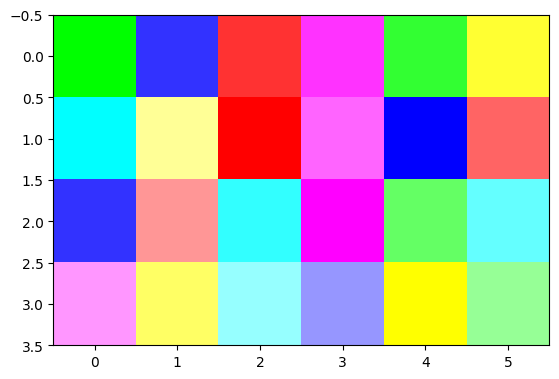

In [48]:
colors = {
    'green-1' : np.array([0,255,0]),
    'blue-2' : np.array([50,50,255]),
    'red-2' : np.array([255,50,50]),
    'pink-2' : np.array([255,50,255]),
    'green-2' : np.array([50,255,50]),
    'yellow-2' : np.array([255,255,50]),
    'teal-1' : np.array([0,255,255]),
    'yellow-4' : np.array([255,255,150]),
    'red-1' : np.array([255,0,0]),
    'pink-3' : np.array([255,100,255]),
    'blue-1' : np.array([0,0,255]),
    'red-3' : np.array([255,100,100]),
    'blue-3' : np.array([50,50,255]),
    'red-4' : np.array([255,150,150]),
    'teal-2' : np.array([50,255,255]),
    'pink-1' : np.array([255,0,255]),
    'green-3' : np.array([100,255,100]),
    'teal-3' : np.array([100,255,255]),
    'pink-4' : np.array([255,150,255]),
    'yellow-3' : np.array([255,255,100]),
    'teal-4' : np.array([150,255,255]),
    'green-4' : np.array([150,150,255]),
    'yellow-1' : np.array([255,255,0]),
    'blue-4' : np.array([150,255,150]),
}

color_data = []
for i in colors:
    color_data.append(colors[i]/255.0)

color_data = np.array(color_data)
show_img_without_title(color_data.reshape(4,6,3))

## Generating randomnly initialised weight vector

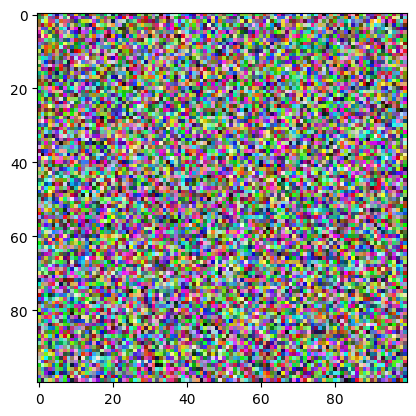

In [49]:
inital_weight = np.random.rand(100, 100, 3)
show_img_without_title(inital_weight)

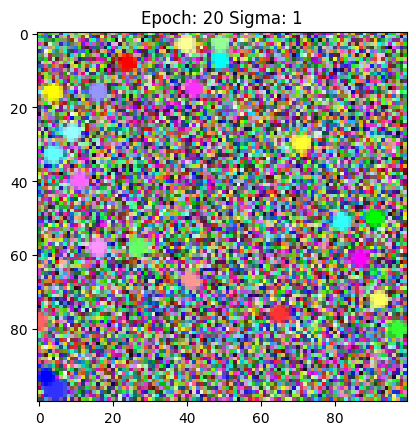

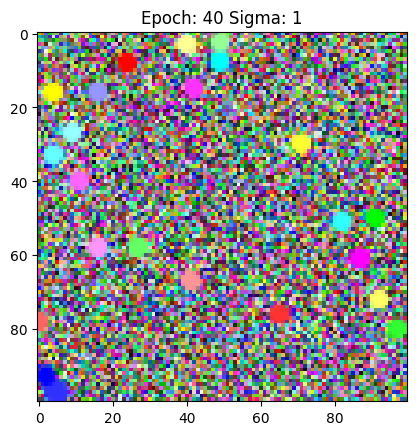

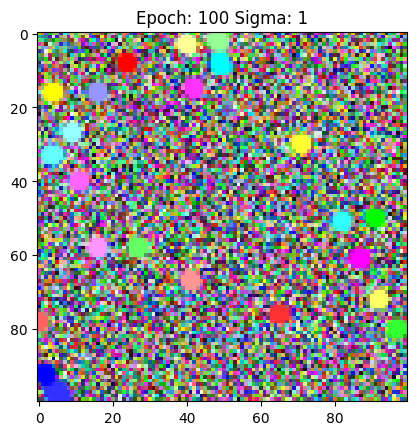

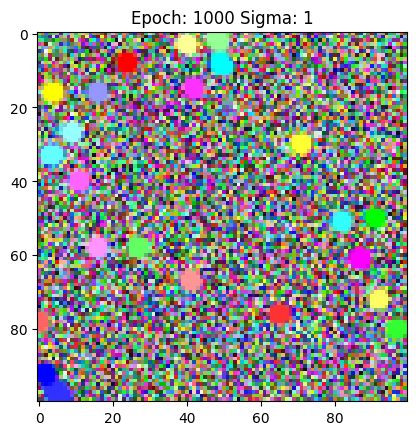

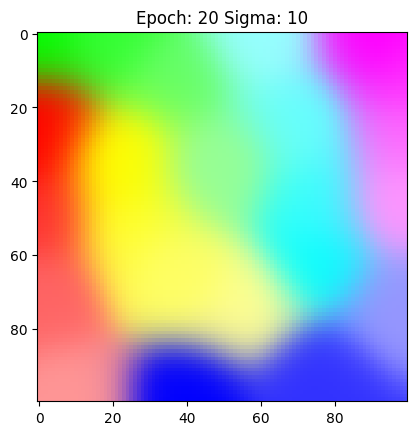

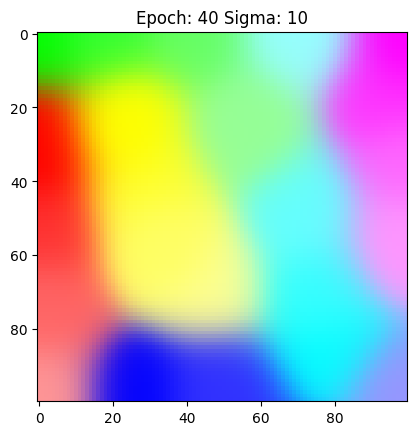

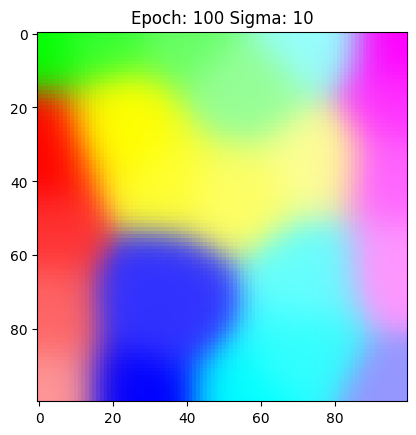

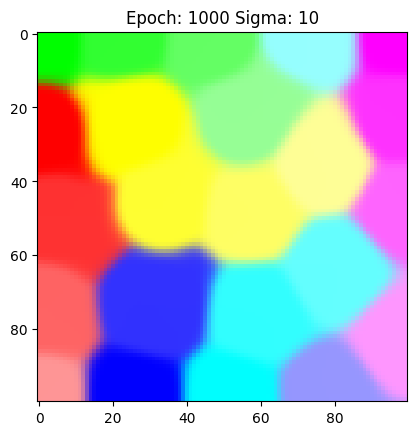

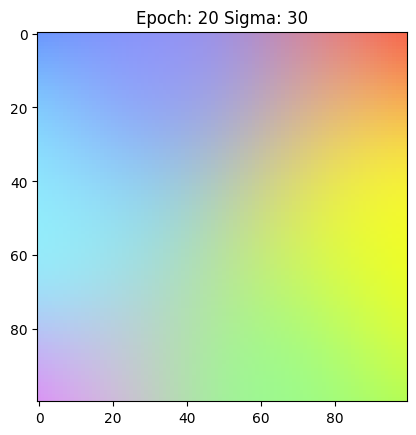

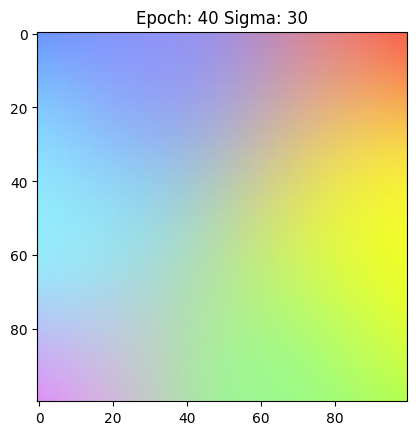

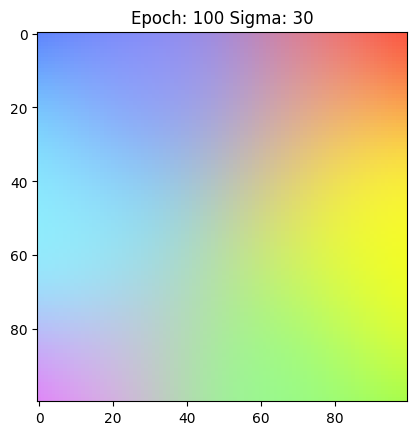

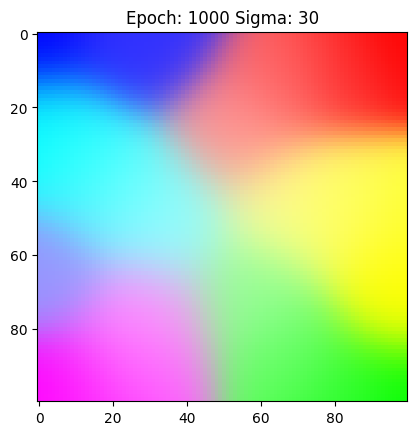

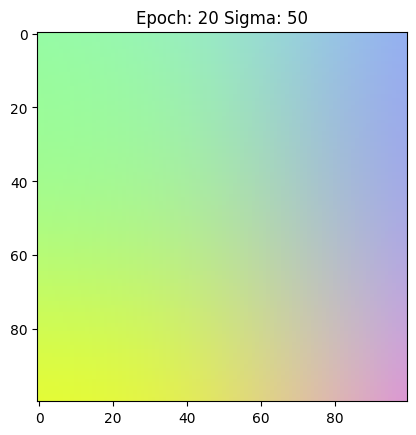

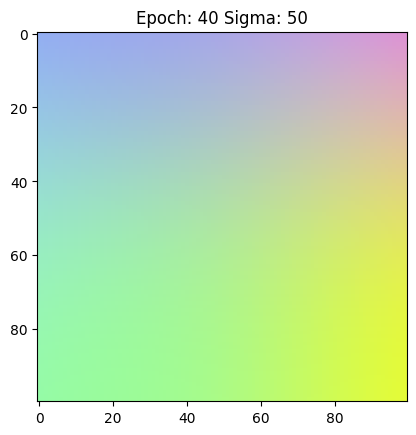

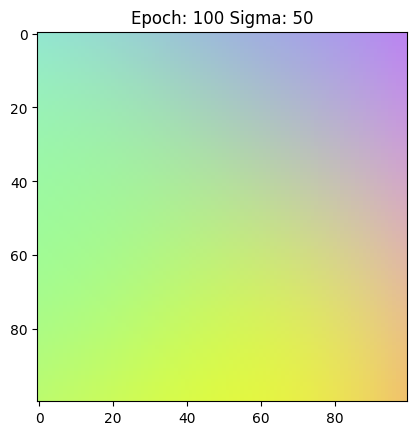

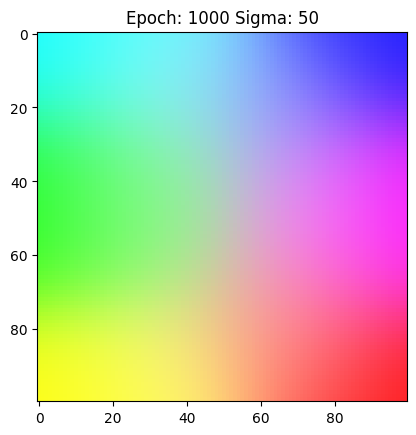

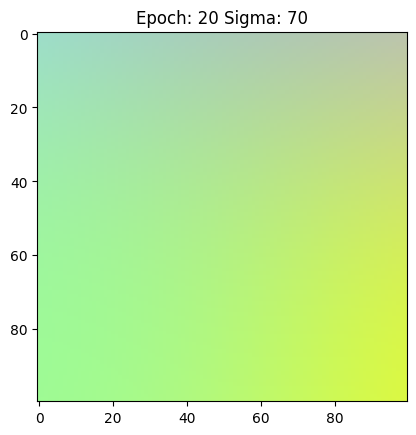

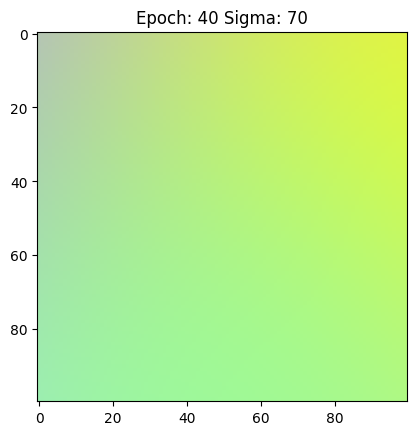

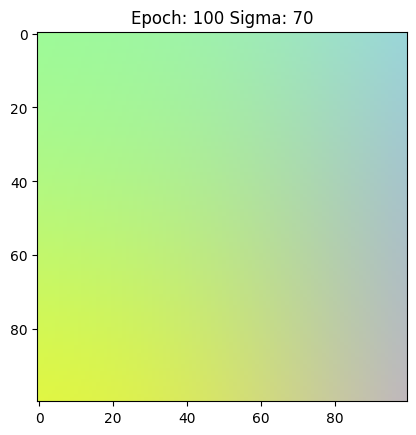

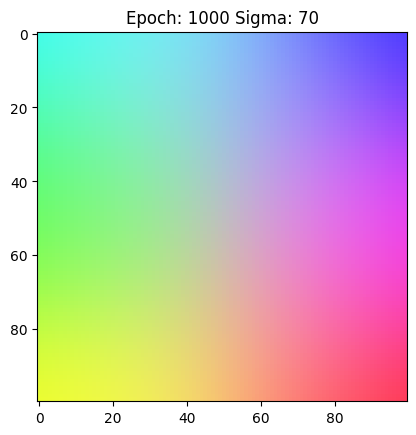

In [50]:
# Initializing initial distance matrix with zeroes
distance_mat = np.zeros(shape=(len(inital_weight),len(inital_weight)))  

# Initializing neighborhood distance matrix with zeroes
nbh_distance = np.zeros(shape=(len(inital_weight),len(inital_weight)))

# Defining parameters
show_plot_list = [20,40,100,1000]
sigma_o_list = [1,10,30,50,70]
alpha_o = 0.8
epochs = 1000 
num_colors = 24

# Initializing the Kohonen Self Organizing Map
for sigma_o in sigma_o_list:
    inital_weight = np.random.rand(100, 100, 3)             # Initializing the intial weight matrix
    for l in range(epochs):                                 # Running loop for number of epochs
        for i in range(num_colors):                         # Running loop for all colors

            for j in range(len(inital_weight)):             # Loop to find winning node IDs
                for k in range(len(inital_weight[j])):
                    distance_mat[j][k]= distance(inital_weight[j][k],color_data[i])
            idx_x,idx_y = min_distance_value_index(distance_mat)

            for j in range(len(inital_weight)):             # Loop to find neighborhood function 
                for k in range(len(inital_weight[j])):
                    dist = distance(np.array([j,k]),np.array([idx_x,idx_y]))
                    nbh_distance[j][k],_ = nbh(sigma_o,l,epochs,dist) 
        
            for j in range(len(inital_weight)):             # Loop to reward nodes
                for k in range(len(inital_weight[j])):
                    l_rate = get_learning_rate(alpha_o,l,epochs)
                    dw=l_rate * nbh_distance[j][k] * (color_data[i] - inital_weight[j][k])
                    inital_weight[j][k] +=  dw
        
        if l+1 in show_plot_list:                           # Display Output for specified epochs
            show_img(inital_weight,sigma_o,l+1)

The output of the Self-Organizing Map (SOM) changes with variations in 𝜎 (sigma) and the number of epochs. Here are some conclusions based on the output plots as shown above:

1. 𝜎 (sigma) value:
        
* Higher 𝜎 values: When 𝜎 is larger (30, 50, 70), the neighborhood size is wider during the weight update process. This leads to more extensive influence on neighboring neurons, allowing for more significant changes in their weight vectors. As a result, the SOM adapts faster and may exhibit more pronounced changes in the output.

* Lower 𝜎 values (1, 10): Smaller 𝜎 values result in a narrower neighborhood during weight updates. This restricts the influence to a smaller region (clearly evident with sigma 1), causing more localized changes in the weight vectors. Consequently, the SOM adapts more slowly, and the output changes may be more subtle.

2. Number of epochs:
        
* Fewer epochs: With a smaller number of epochs, the SOM has limited time to converge and fully adjust its weight vectors to the input data. The output shows less refinement and does not accurately represent the underlying patterns in the data as shown in epoch 20 with sigma 50.
        
* More epochs: Increasing the number of epochs allows the SOM to undergo more iterations of weight updates and converge towards a more refined representation of the input data. The output becomes more stable, and the SOM captures the underlying patterns and clusters in a better manner (sigma 50 epoch 1000).

In general, as 𝜎 increases and the number of epochs increases, the SOM tends to exhibit more noticeable changes in the output. The neighborhoods have a broader influence, allowing for more significant adjustments to the weight vectors. This can lead to faster adaptation and more distinct clusters in the output.

Conversely, lower 𝜎 values and fewer epochs result in more localized changes and slower adaptation. The output shows less differentiation between clusters, and the SOM requires more iterations to converge to an optimal representation.